In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import os
import matplotlib.pyplot as plt
import numpy as np
drive_path='/content/drive/MyDrive'

files=os.listdir(drive_path)
print(files)

['Colab Notebooks', 'LORS OTHER ACCOUNT UPDATED 4 2.gdoc', 'CHAPTER 4.gdoc', 'abstractform_241122_105154.pdf', 'abstractform_241122_105154.gdoc', 'Major Project Abstract Form AC10 NEQW.docx', 'NEURAL NETWORKS AND DEEP LEARNING UNIT 5.gdoc', 'COMPILER DESIGN UNIT 4.gdoc', 'UNIT 4 CNS.gdoc', 'UNIT 5 CNS.gdoc', 'SOP Form (44).doc', 'AC01_MINIPROJ_V1.gdoc', 'AC10_REDO MASTER (1)_edited (1).gdoc', 'AC10_REDO MASTER (1)_edited.gdoc', 'AC10_Final.pptx', 'AC10_REDO MASTER_hello.gdoc', 'NEURAL NETWORKS AND DEEP LEARNING UNIT 4.gdoc', 'SOP Form (44).docx', 'Modern Computer Vision', 'MyDataSet', 'IRMAI']


In [30]:
def imshow(title="",image=None,size=3):
  h,w=image.shape[0],image.shape[1]
  aspect_ratio=w/h


  plt.figure(figsize=(size*aspect_ratio,size))
  plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [82]:
from google.colab import drive
drive.mount('/content/drive')

import os
import matplotlib.pyplot as plt
import numpy as np
drive_path='/content/drive/MyDrive'

files=os.listdir(drive_path)
print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Colab Notebooks', 'LORS OTHER ACCOUNT UPDATED 4 2.gdoc', 'CHAPTER 4.gdoc', 'abstractform_241122_105154.pdf', 'abstractform_241122_105154.gdoc', 'Major Project Abstract Form AC10 NEQW.docx', 'NEURAL NETWORKS AND DEEP LEARNING UNIT 5.gdoc', 'COMPILER DESIGN UNIT 4.gdoc', 'UNIT 4 CNS.gdoc', 'UNIT 5 CNS.gdoc', 'SOP Form (44).doc', 'AC01_MINIPROJ_V1.gdoc', 'AC10_REDO MASTER (1)_edited (1).gdoc', 'AC10_REDO MASTER (1)_edited.gdoc', 'AC10_Final.pptx', 'AC10_REDO MASTER_hello.gdoc', 'NEURAL NETWORKS AND DEEP LEARNING UNIT 4.gdoc', 'SOP Form (44).docx', 'Modern Computer Vision', 'MyDataSet', 'IRMAI']


In [83]:

image_path='/content/drive/MyDrive/MyDataSet/Class1/nature1.jpg'
image=cv.imread(image_path)

In [84]:
# TASK 9 Thresholding, Binarization & Adaptive Thresholding
# In this lesson we'll learn:
# Binarized Images
# Thresholding Methods
# Adaptive Thresholding
# SkImage's Threshold Local

In [85]:
image_path='/content/drive/MyDrive/MyDataSet/SCLASS/scanned.jpg'

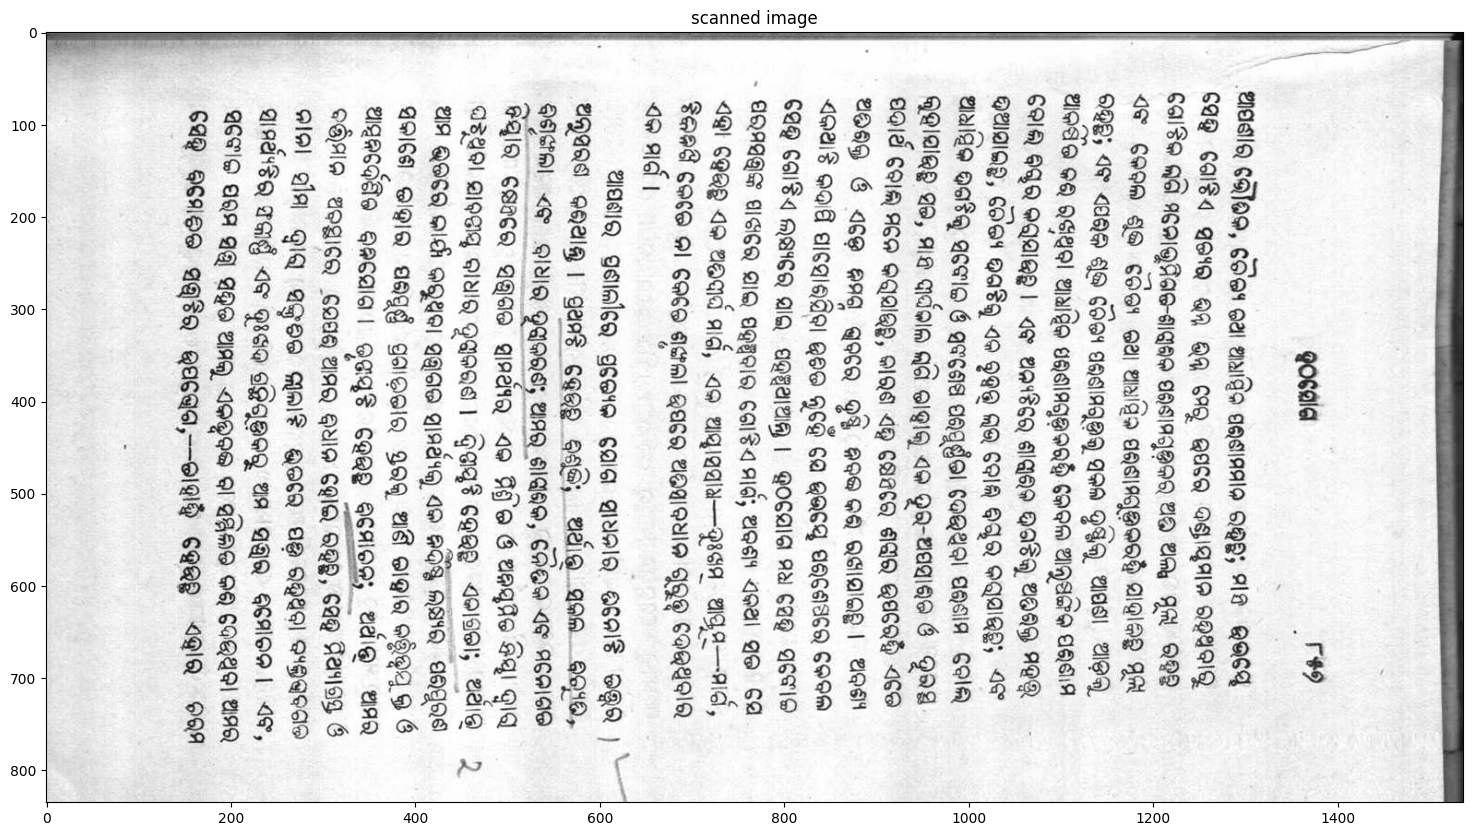

In [86]:
image=cv.imread(image_path)
imshow("scanned image",image,10)

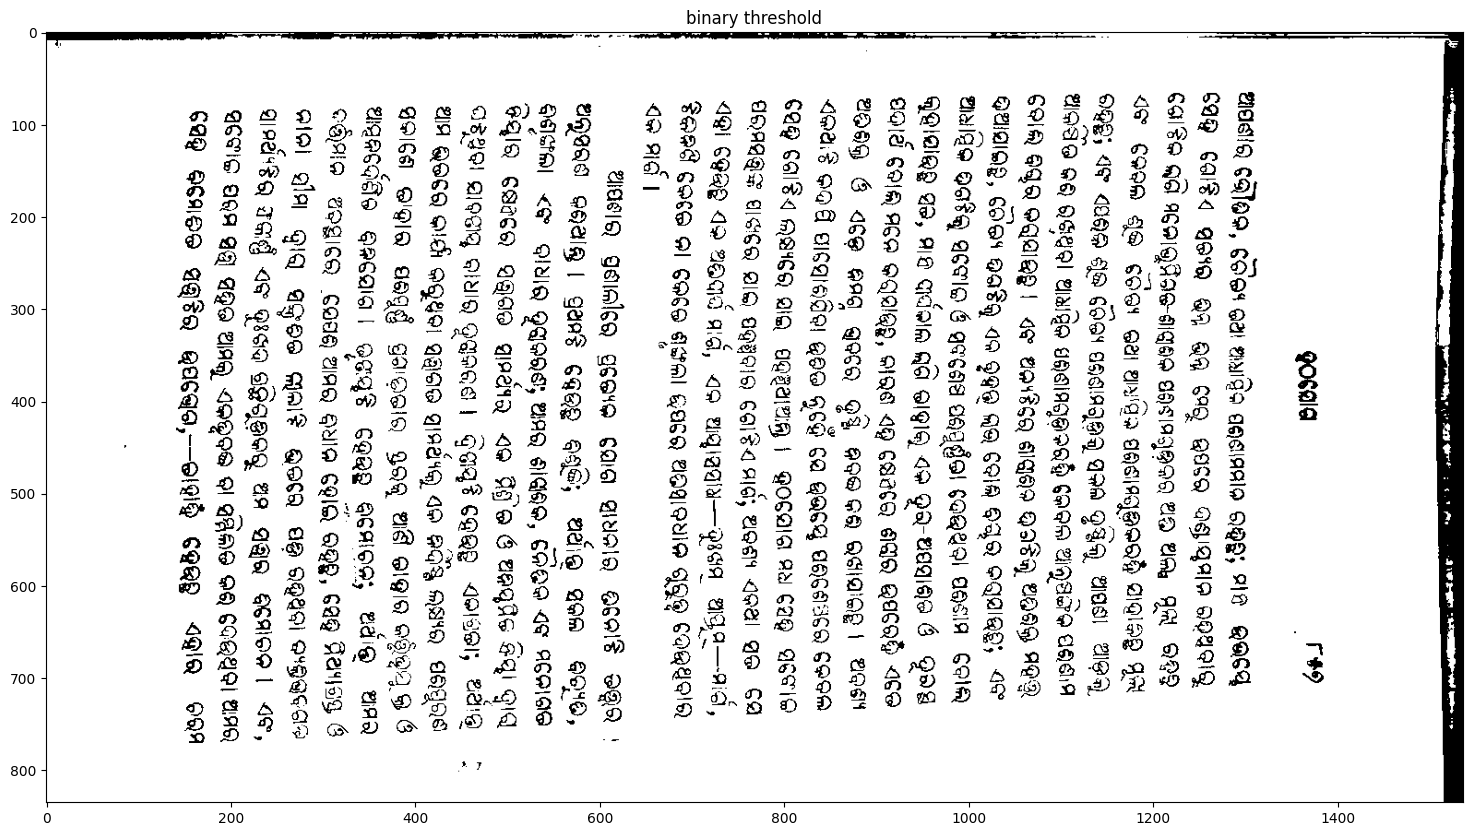

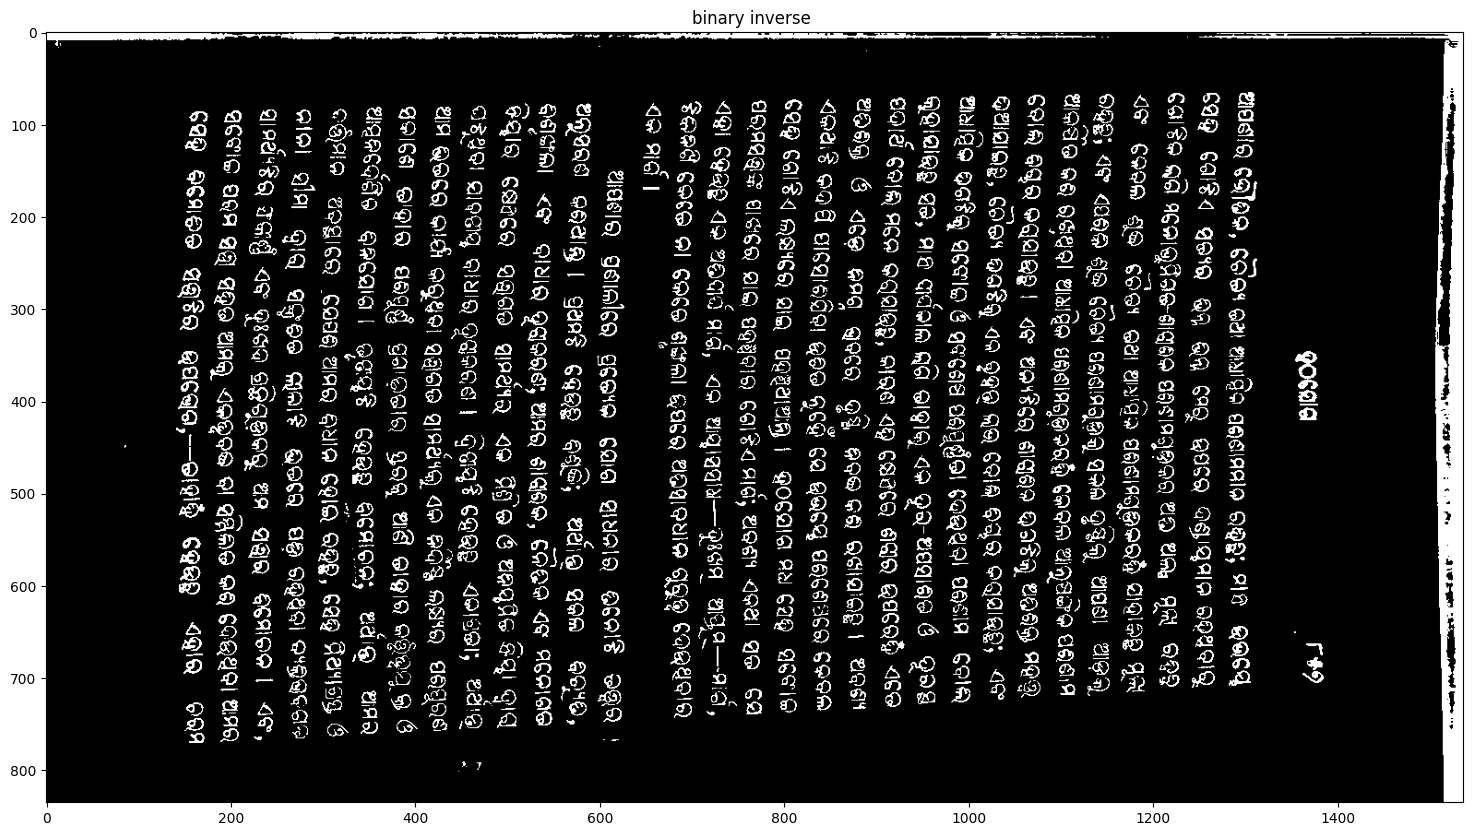

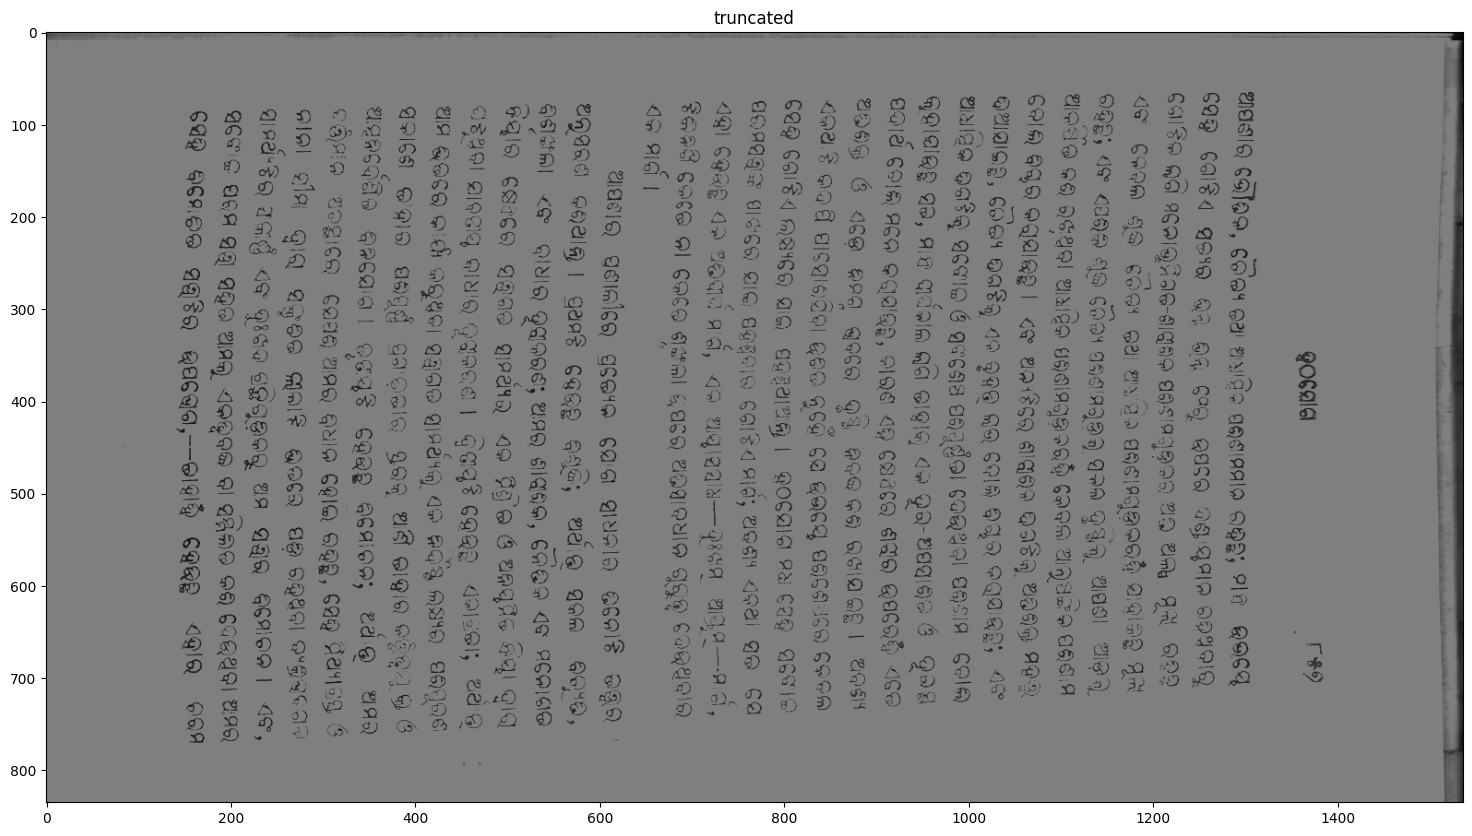

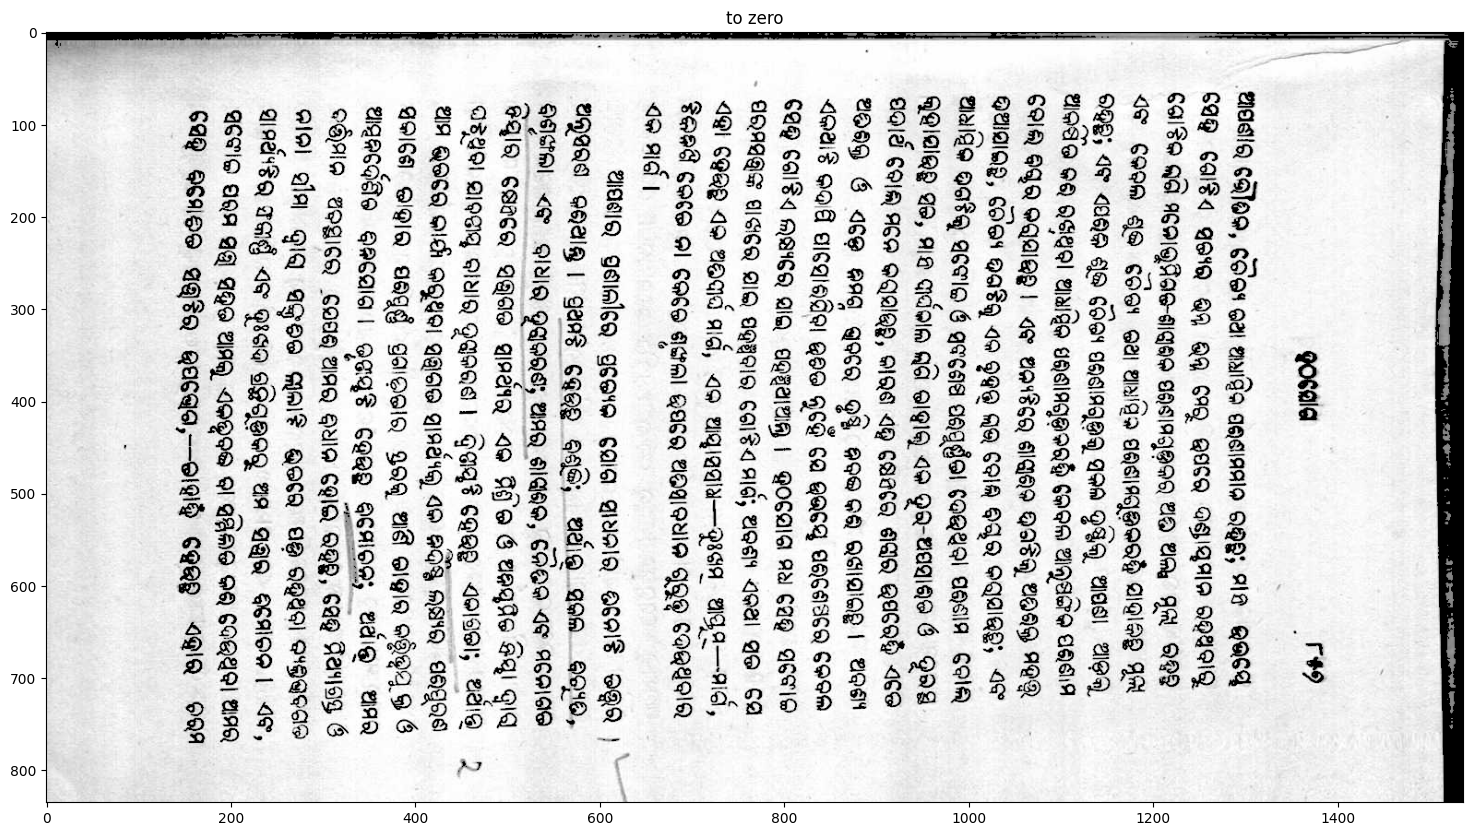

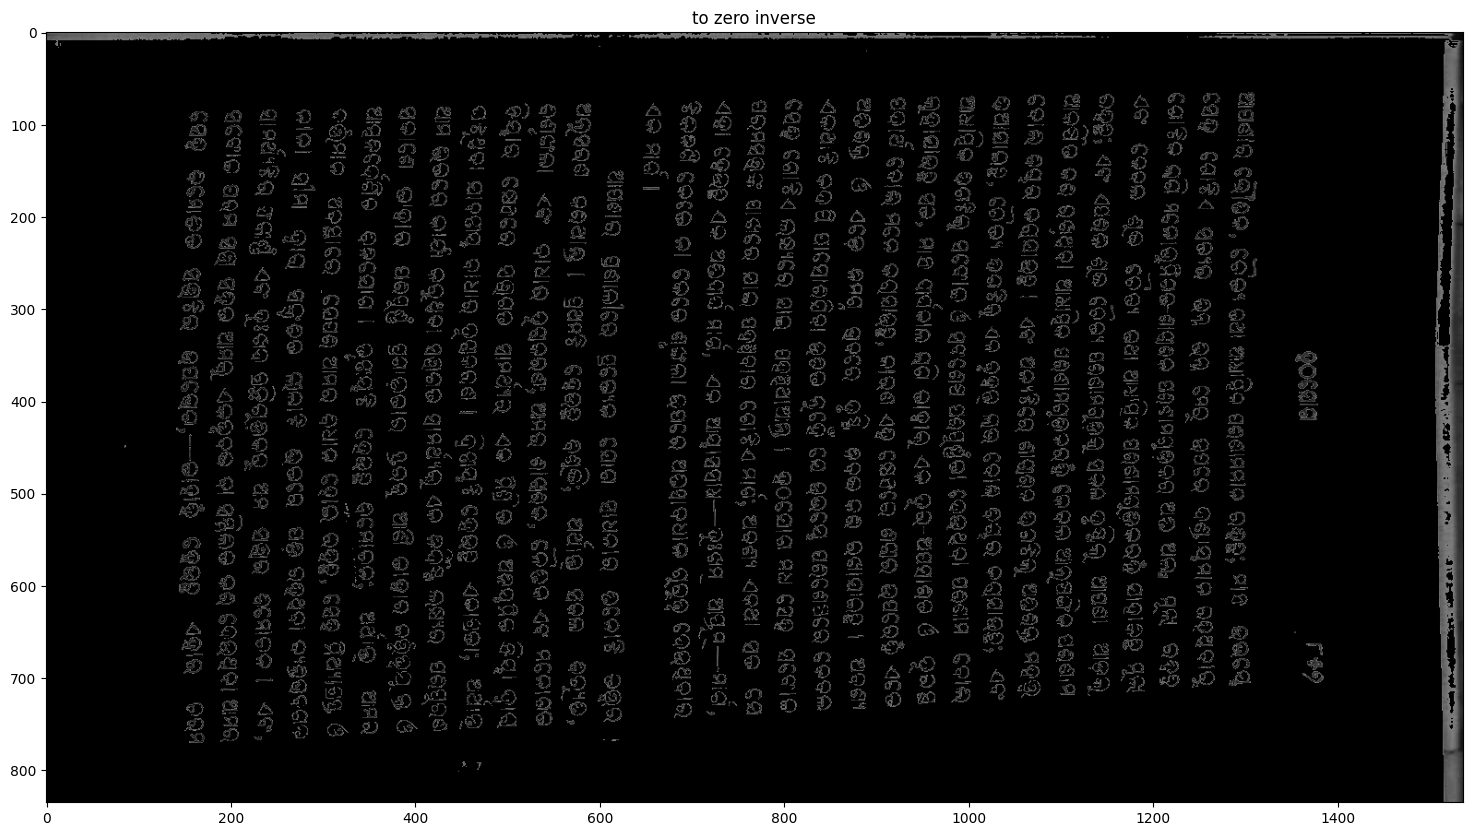

In [87]:
# Values below 127 goes to 0 or black, everything above goes to 255 (white)
ret,thresh1=cv.threshold(image,127,255,cv.THRESH_BINARY)
imshow("binary threshold",thresh1,10)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2=cv.threshold(image,127,255,cv.THRESH_BINARY_INV)
imshow("binary inverse ",thresh2,10)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3=cv.threshold(image,127,225,cv.THRESH_TRUNC)
imshow("truncated",thresh3,10)

# Values below 127 go to 0, above 127 are unchanged
ret,thresh4=cv.threshold(image,127,255,cv.THRESH_TOZERO)
imshow("to zero",thresh4,10)

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret,thresh5=cv.threshold(image,127,255,cv.THRESH_TOZERO_INV)
imshow("to zero inverse",thresh5,10)


In [88]:
# Adaptive Thresholding
# ADAPTIVE_THRESH_MEAN_C
# THRESH_OTSU
# cv2.adaptiveThreshold Parameters
# **cv2.adaptiveThreshold**(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst

# src – Source 8-bit single-channel image.
# dst – Destination image of the same size and the same type as src .
# maxValue – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
# adaptiveMethod – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
# thresholdType – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
# blockSize – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
# C – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.

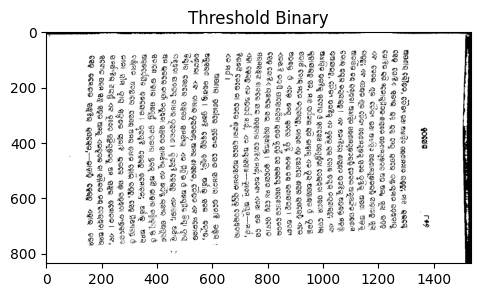

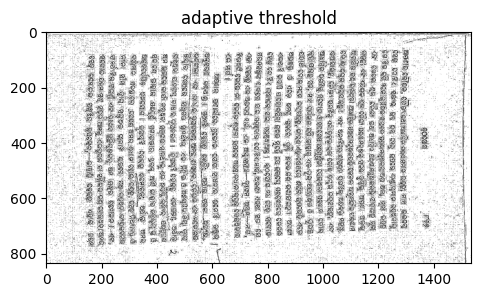

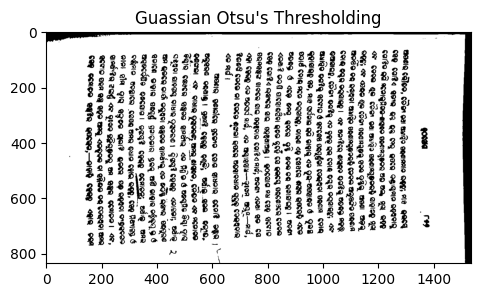

In [89]:
# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

# It's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Using adaptive thresholding
thresh = cv.adaptiveThreshold(
    gray_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, 5
)

imshow("adaptive threshold",thresh)




# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(image, (5,5), 0)
gray_blur = cv.cvtColor(blur, cv.COLOR_BGR2GRAY) # Changed line: Converting blurred image to grayscale
_, th3 = cv.threshold(gray_blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # Changed line: Applying threshold to gray_blur
imshow("Guassian Otsu's Thresholding", th3)

In [90]:
# SkImage Threshold Local

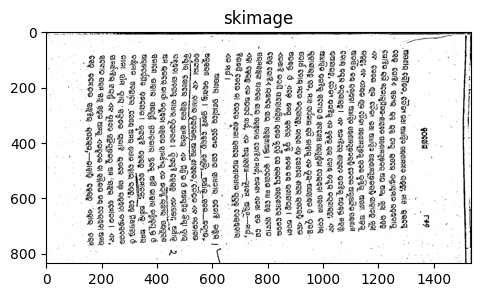

In [91]:
from skimage.filters import threshold_local

V=cv.split(cv.cvtColor(image,cv.COLOR_BGR2HSV))[2]
T=threshold_local(V,25,offset=15,method='gaussian')

skimage=(V>T).astype('uint8')*255
imshow("skimage",skimage)